# **comparar los métodos de agrupamiento (k-means, k-modes, agrupamiento jerárquico aglomerativo, Gaussian Mixture Models, y DBSCAN) en los conjuntos de datos de Iris y Digits**

In [ ]:
#!pip install kmodes

# *IRIS*

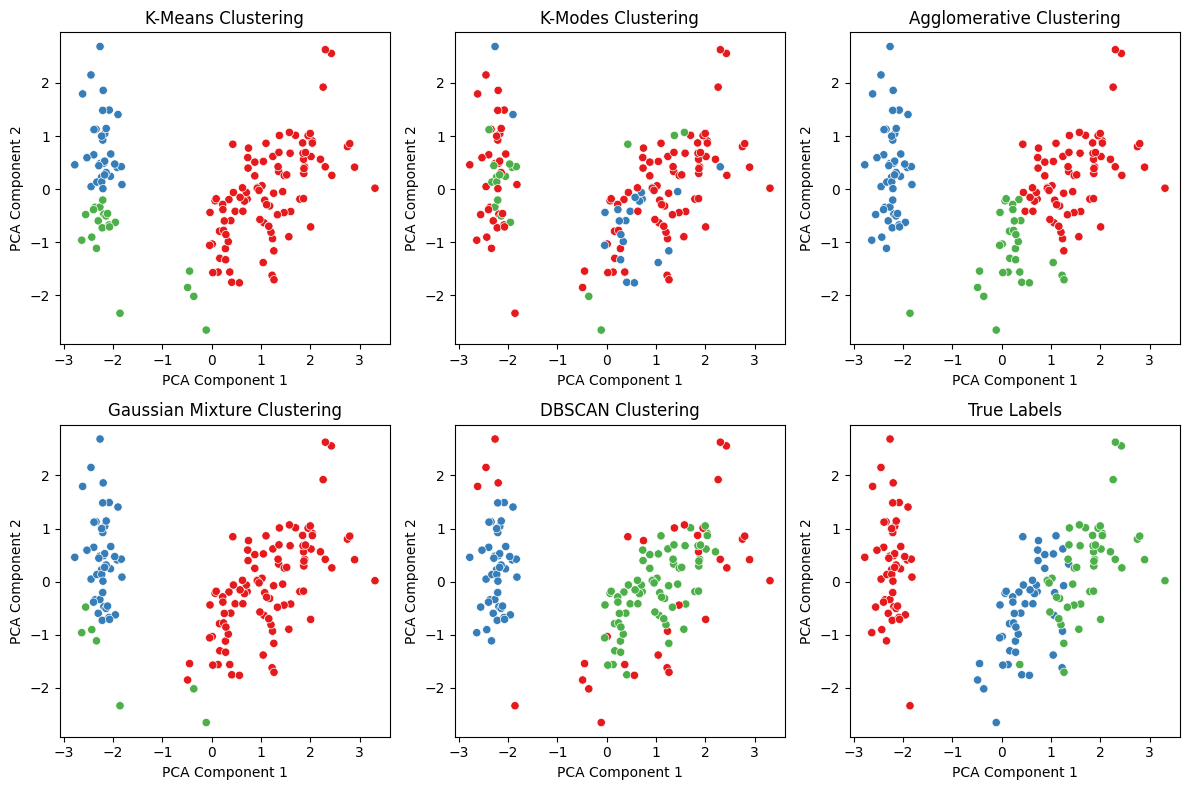

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from kmodes.kmodes import KModes

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y_true = iris.target

# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducir la dimensionalidad a 2D usando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Inicializar métodos de agrupamiento con los parámetros básicos
kmeans = KMeans(n_clusters=3, random_state=42)
kmodes = KModes(n_clusters=3, init="Huang", n_init=5, random_state=42)
agglomerative = AgglomerativeClustering(n_clusters=3)
gmm = GaussianMixture(n_components=3, random_state=42)
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Aplicar agrupamiento y obtener etiquetas de cada método
y_kmeans = kmeans.fit_predict(X_scaled)
y_kmodes = kmodes.fit_predict(X)  # para datos sin escalar
y_agglomerative = agglomerative.fit_predict(X_scaled)
y_gmm = gmm.fit_predict(X_scaled)
y_dbscan = dbscan.fit_predict(X_scaled)

# Diccionario para almacenar etiquetas de cada método
clusterings = {
    "K-Means": y_kmeans,
    "K-Modes": y_kmodes,
    "Agglomerative": y_agglomerative,
    "Gaussian Mixture": y_gmm,
    "DBSCAN": y_dbscan
}

# Visualizar resultados con PCA
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, (method, y_pred) in enumerate(clusterings.items()):
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_pred, palette="Set1", ax=axes[i], legend=False)
    axes[i].set_title(f"{method} Clustering")
    axes[i].set_xlabel("PCA Component 1")
    axes[i].set_ylabel("PCA Component 2")

# Visualización de las clases reales para referencia
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_true, palette="Set1", ax=axes[-1], legend=False)
axes[-1].set_title("True Labels")
axes[-1].set_xlabel("PCA Component 1")
axes[-1].set_ylabel("PCA Component 2")

plt.tight_layout()
plt.show()



1. **K-Means Clustering**:
   - Los puntos están bien agrupados, con una clara separación entre las clases (especialmente la clase en azul a la izquierda y la clase en rojo a la derecha).
   - K-means parece haber capturado la estructura general de los datos, aunque hay cierta confusión en la región intermedia, donde los puntos de diferentes colores se mezclan un poco.

2. **K-Modes Clustering**:
   - Los clústeres generados no muestran una separación clara como en el caso de K-means. Hay más puntos mezclados entre los grupos.
   - Esto puede indicar que K-modes no es tan adecuado para datos numéricos como el conjunto de Iris, ya que está diseñado para datos categóricos.

3. **Agglomerative Clustering**:
   - Los resultados son similares a K-means, con una separación relativamente clara de los clústeres.
   - Parece capturar las agrupaciones en el espacio PCA bastante bien, lo cual es común en métodos jerárquicos, que pueden adaptarse a estructuras de datos complejas.

4. **Gaussian Mixture Clustering (GMM)**:
   - Los clústeres generados son parecidos a los de K-means, con buena separación en los bordes, aunque hay cierta confusión entre los grupos en el centro.
   - Esto es esperado, ya que GMM modela la estructura de los datos en base a distribuciones gaussianas y tiende a crear agrupaciones suaves, donde los puntos en los límites pueden asignarse a diferentes clústeres con ciertas probabilidades.

5. **DBSCAN Clustering**:
   - DBSCAN muestra una estructura más dispersa y menos definida en comparación con otros métodos.
   - DBSCAN es sensible a la densidad y funciona bien cuando hay clústeres de diferentes densidades; sin embargo, en el caso de Iris, que tiene clústeres más definidos, DBSCAN puede no ser la mejor elección, ya que tiende a tratar muchos puntos como ruido o parte de un mismo clúster.

6. **True Labels (Etiquetas Reales)**:
   - La gráfica de etiquetas reales muestra una separación bastante clara entre las tres clases, lo cual proporciona un punto de referencia para evaluar la calidad de los otros métodos.
   - Podemos ver que algunos métodos, como K-means, Agglomerative Clustering y GMM, se aproximan bastante a esta distribución de las clases reales.

### En conclusión...
- **K-means**, **Agglomerative Clustering** y **Gaussian Mixture Models (GMM)** parecen ser las técnicas que mejor capturan la estructura de los datos en este caso.
- **DBSCAN** no produce una separación clara, probablemente porque el conjunto de datos Iris no tiene variaciones densas en los clústeres.
- **K-modes** no es ideal para datos numéricos como el conjunto Iris, ya que está diseñado para datos categóricos y no logra una separación clara.


# *DIGITS*

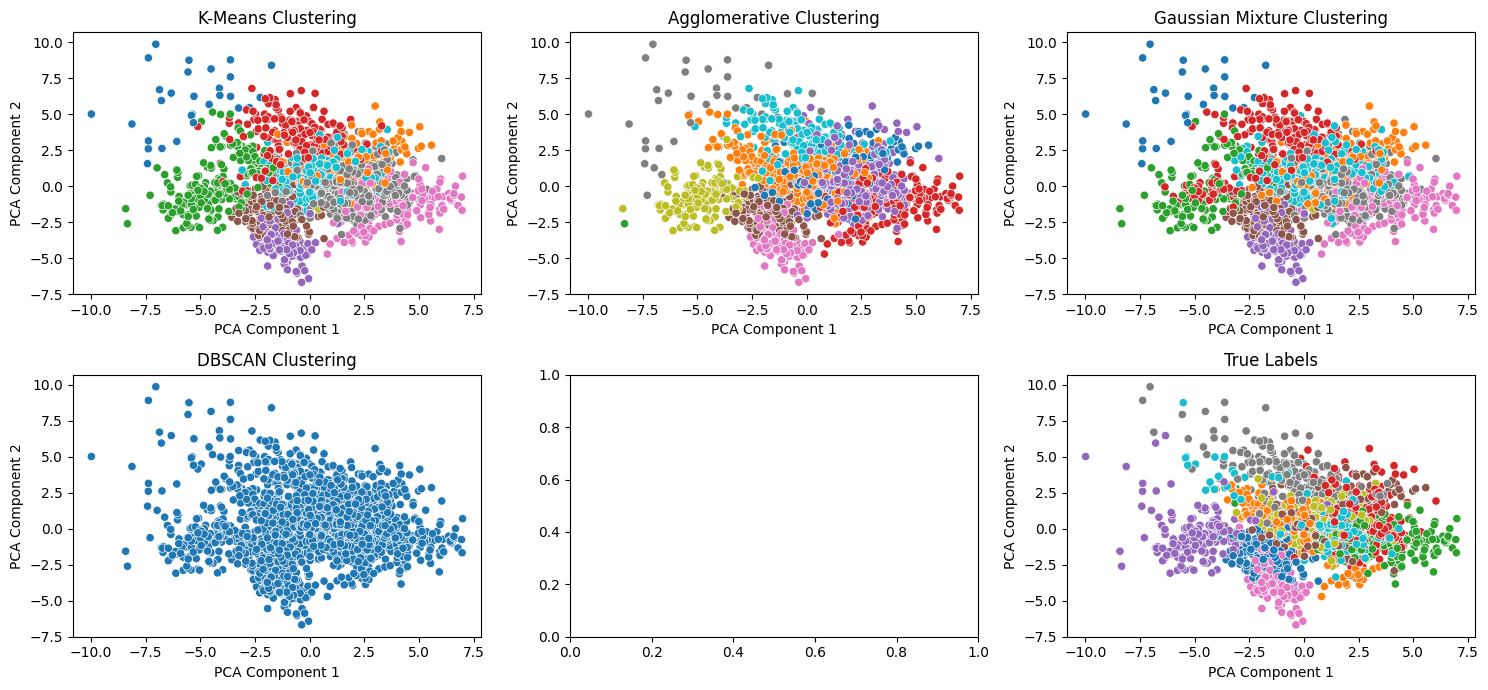

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

# Cargar el conjunto de datos Digits
digits = load_digits()
X = digits.data
y_true = digits.target

# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducir la dimensionalidad a 2D usando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Inicializar métodos de agrupamiento con los parámetros básicos
kmeans = KMeans(n_clusters=10, random_state=42)  # 10 dígitos en el conjunto de datos
agglomerative = AgglomerativeClustering(n_clusters=10)
gmm = GaussianMixture(n_components=10, random_state=42)
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Ajustar parámetros según el conjunto

# Aplicar agrupamiento y obtener etiquetas de cada método
y_kmeans = kmeans.fit_predict(X_scaled)
y_agglomerative = agglomerative.fit_predict(X_scaled)
y_gmm = gmm.fit_predict(X_scaled)
y_dbscan = dbscan.fit_predict(X_scaled) #NO APLICA KMODES

# Diccionario para almacenar etiquetas de cada método
clusterings = {
    "K-Means": y_kmeans,
    "Agglomerative": y_agglomerative,
    "Gaussian Mixture": y_gmm,
    "DBSCAN": y_dbscan
}

# Visualizar resultados con PCA
fig, axes = plt.subplots(2, 3, figsize=(15, 7))
axes = axes.flatten()

for i, (method, y_pred) in enumerate(clusterings.items()):
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_pred, palette="tab10", ax=axes[i], legend=False)
    axes[i].set_title(f"{method} Clustering")
    axes[i].set_xlabel("PCA Component 1")
    axes[i].set_ylabel("PCA Component 2")

# Visualización de las clases reales para referencia
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_true, palette="tab10", ax=axes[-1], legend=False)
axes[-1].set_title("True Labels")
axes[-1].set_xlabel("PCA Component 1")
axes[-1].set_ylabel("PCA Component 2")

plt.tight_layout()
plt.show()


1. **K-Means Clustering**:
   - La agrupación muestra cierta separación de clústeres en el espacio reducido, aunque algunos dígitos se solapan entre sí.
   - Dado que K-means minimiza la distancia dentro de los clústeres, los puntos están agrupados de forma relativamente compacta. Sin embargo, los dígitos que tienen formas similares (como 3 y 8) pueden superponerse.

2. **Agglomerative Clustering**:
   - El método de agrupamiento jerárquico también genera clústeres relativamente compactos, pero hay una mayor cantidad de solapamiento entre algunos dígitos.
   - Esto podría deberse a la naturaleza jerárquica del método, que no siempre es óptima para conjuntos de datos complejos con clases similares.

3. **Gaussian Mixture Clustering (GMM)**:
   - GMM muestra clústeres más dispersos, especialmente en los bordes de los grupos, lo cual es esperado ya que este método permite la superposición de clústeres.
   - Este método asume que los datos siguen una distribución gaussiana en cada componente, lo cual puede ser útil para datos con distribuciones similares, aunque no siempre es ideal para clases muy distintas.

4. **DBSCAN Clustering**:
   - DBSCAN asignó la mayoría de los puntos a un solo clúster y no identificó grupos significativos. Esto es porque el conjunto Digits no tiene una variación de densidad clara entre los dígitos, lo cual es problemático para DBSCAN, que se basa en la densidad de puntos para formar clústeres.
   - Este resultado indica que DBSCAN no es una buena elección para este tipo de datos, ya que está diseñado para detectar clústeres de forma irregular y con variaciones de densidad.

5. **True Labels (Etiquetas Reales)**:
   - La gráfica de las etiquetas reales muestra una estructura de clústeres donde cada dígito tiene cierta separación, aunque con algo de solapamiento. Esto da una referencia de cómo deberían agruparse idealmente los dígitos.

### Conclusiones Generales

- **K-Means y Agglomerative Clustering** son los métodos que parecen capturar mejor la estructura de los datos en este conjunto, logrando clústeres compactos, aunque aún con cierto solapamiento entre algunos dígitos.
- **Gaussian Mixture Model** es útil en casos donde puede haber superposición de clases, pero en este caso, su estructura dispersa no ayuda a identificar bien los dígitos de manera separada.
- **DBSCAN** no es adecuado para el conjunto `digits`, ya que este método necesita una diferencia de densidad clara entre clústeres, algo que no ocurre en los datos de imágenes de dígitos.

En resumen, **K-Means** y **Agglomerative Clustering** parecen ser las mejores opciones para este tipo de datos de dígitos, donde se requiere una estructura de clúster más compacta.